# Assignment 2: Description

In this assignment, you will experiment with the NYC Cab dataset from 2016. This dataset provides information (e.g., pickup/dropoff time, # of passengers, trip distance, fare) about cab trips done in New York City during 2016. You can learn more about the dataset clicking [here!](https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page)

You will load this dataset into pandas, sqlite, and duckdb. You will compare the performance of multiple data-science like queries, including performing a fare estimation (i.e., predicting how much a ride will cost depending on distance) using machine learning.

In the first section you will implement the loader in duckdb **[5 points].**

The second section has two data-science like queries, the implementation in pandas is already given, and you should use it as a logical/correctness reference to write the queries for sqlite and duckdb, remember to compare the performance of the three different systems **[25 points]**.

Finally, in the third section you will implement a simple machine learning algorithm in duckdb to predict fare costs. A full implementation of pandas is given and a partial of sqlite. Again, use them as a logical/correctness reference and compare the performance of the three different systems. **[40 points]**

Remember to submit your notebook with the answers to all sections as well as a PDF document (max two papes) listing all experienced execution times and reasoning about the performance difference in these systems.

# **SETUP**

First we need to install duckdb.

In [0]:
!pip install duckdb

^C


Now we download the NYC Cab dataset and decompress it. 

Since SQLite's python client doesn't provide a built-in copy into function, we also provide a downloadable version of a loaded SQLite instance.

In [0]:
import urllib
import os
import zipfile

print("Downloading dataset")
if not os.path.isfile("yellow_tripdata_2016-01.csv"):
	urllib.request.urlretrieve("https://s3.amazonaws.com/nyc-tlc/trip+data/yellow_tripdata_2016-01.csv", "yellow_tripdata_2016-01.csv")

print("Downloading SQLite yellow_tripdata")
if not os.path.isfile("yellow_tripdate_sqlite.db.zip"):
	urllib.request.urlretrieve("https://zenodo.org/record/3532986/files/yellow_tripdate_sqlite.db.zip?download=1", "yellow_tripdate_sqlite.db.zip")


print("Decompressing files")
if not os.path.isfile("yellow_tripdate_sqlite.db"):
	with zipfile.ZipFile("yellow_tripdate_sqlite.db.zip","r") as zip_ref:
		zip_ref.extractall("./")


Decompressing files


# **Loading The Data** [5pts]

In this section our goal is to write code to load the data in duckdb. First we start with importing the necessary libraries.




In [0]:
# Importin necessary libraries
import sqlite3 
import pandas
import duckdb
import time
import os


Next we import the data for the different database types.

In [0]:
# Importing data for pandas
yellow_tripdata_pandas = pandas.read_csv('yellow_tripdata_2016-01.csv', low_memory=True)

In [0]:
CREATE_TRIPDATA_TBL_SQL = """
CREATE TABLE yellow_tripdata_2016_01 (   
    VendorID bigint,
    tpep_pickup_datetime timestamp,
    tpep_dropoff_datetime timestamp,
    passenger_count bigint,
    trip_distance double,
    pickup_longitude double,
    pickup_latitude double,
    RatecodeID bigint,
    store_and_fwd_flag varchar,
    dropoff_longitude double,
    dropoff_latitude double,
    payment_type bigint,
    fare_amount double,
    extra double,
    mta_tax double,
    tip_amount double,
    tolls_amount double,
    improvement_surcharge double,
    total_amount double
) 
"""
# Importin data for duckdb
if os.path.isfile("yellow_tripdata_duck.db"):
  os.system("rm yellow_tripdata_duck.db")
db = duckdb.connect('yellow_tripdata_duck.db')
duck_cursor = db.cursor()

# As SQLite and duckDB have the same syntax, we are able to use the SQL statement.
duck_cursor.execute(CREATE_TRIPDATA_TBL_SQL) 
duck_cursor.execute("COPY yellow_tripdata_2016_01 FROM 'yellow_tripdata_2016-01.csv' WITH HEADER")

# **Queries** [25 pts]

**Query Q1 [10 pts]**: Count distinct values for each column.

**TIP:** We provide you with the pandas implementation, be sure to use it to check for correctness!

In the first query we want to compare the performance of a simple hash-function in our Database Management Systems (DBMSs). To do so, we implement and run a query that counts the distinct values for each column.
In general, most systems use hash-based algorithms to find the distinct values in a large set of values (e.g., a database column).
Obs: Sort-based algorithm are an alternative by usually slower.


In [0]:
import time
import sqlite3 

#Fill Query Here (The same syntax works for both SQLite and DuckDB)
sql_01 = """ 
SELECT
    COUNT(DISTINCT VendorID), 
    COUNT(DISTINCT tpep_pickup_datetime), 
    COUNT(DISTINCT tpep_dropoff_datetime), 
    COUNT(DISTINCT passenger_count), 
    COUNT(DISTINCT trip_distance),
    COUNT(DISTINCT pickup_longitude), 
    COUNT(DISTINCT pickup_latitude), 
    COUNT(DISTINCT RatecodeID), 
    COUNT(DISTINCT store_and_fwd_flag), 
    COUNT(DISTINCT dropoff_longitude), 
    COUNT(DISTINCT dropoff_latitude), 
    COUNT(DISTINCT payment_type), 
    COUNT(DISTINCT fare_amount), 
    COUNT(DISTINCT extra), 
    COUNT(DISTINCT mta_tax), 
    COUNT(DISTINCT tip_amount),
    COUNT(DISTINCT tolls_amount), 
    COUNT(DISTINCT improvement_surcharge), 
    COUNT(DISTINCT total_amount)
FROM 
    yellow_tripdata_2016_01 
"""

db_sqlite = sqlite3.connect('yellow_tripdate_sqlite.db') #Connects to a SQLite database instance called voters_sqlite.db
sqlite_cursor = db_sqlite.cursor() # Creates a Cursor, that allows us to issue Create Table Stataments

#Implement Pandas Query Here
def query_01_pandas():
  print(yellow_tripdata_pandas['VendorID'].nunique(),yellow_tripdata_pandas['tpep_pickup_datetime'].nunique(),
          yellow_tripdata_pandas['tpep_dropoff_datetime'].nunique(),yellow_tripdata_pandas['passenger_count'].nunique(),
          yellow_tripdata_pandas['trip_distance'].nunique(),yellow_tripdata_pandas['pickup_longitude'].nunique(),
          yellow_tripdata_pandas['pickup_latitude'].nunique(),yellow_tripdata_pandas['RatecodeID'].nunique(),
          yellow_tripdata_pandas['store_and_fwd_flag'].nunique(),yellow_tripdata_pandas['dropoff_longitude'].nunique(),
          yellow_tripdata_pandas['dropoff_latitude'].nunique(),yellow_tripdata_pandas['payment_type'].nunique(),
          yellow_tripdata_pandas['fare_amount'].nunique(),yellow_tripdata_pandas['extra'].nunique(),
          yellow_tripdata_pandas['mta_tax'].nunique(),yellow_tripdata_pandas['tip_amount'].nunique(),
          yellow_tripdata_pandas['tolls_amount'].nunique(),yellow_tripdata_pandas['improvement_surcharge'].nunique(),
          yellow_tripdata_pandas['total_amount'].nunique())

def query_01_sqlite():
	sqlite_cursor.execute(sql_01)
	result = sqlite_cursor.fetchone()
	print(result)

def query_01_duckdb():
	duck_cursor.execute(sql_01)
	result = duck_cursor.fetchone()
	print(result)

 
start = time.time()
query_01_pandas()
end = time.time()
print("Query in Pandas : " +str(end - start))

start = time.time()
query_01_sqlite()
end = time.time()
print("Query in SQLite : " +str(end - start))

start = time.time()
query_01_duckdb()
end = time.time()
print("Query in DuckDB : " +str(end - start))

2 2368616 2372528 10 4513 35075 62184 7 2 53813 87358 5 1878 35 16 3551 940 7 11166
Query in Pandas : 9.207979679107666
(2, 2368616, 2372528, 10, 4513, 35075, 62184, 7, 2, 53813, 87358, 5, 1878, 35, 16, 3551, 940, 7, 11166)
Query in SQLite : 78.04473280906677
[2, 2368616, 2372528, 10, 4513, 35075, 62184, 7, 2, 53813, 87358, 5, 1878, 35, 16, 3551, 940, 7, 11166]
Query in DuckDB : 6.603049993515015




In our second query, we want to compare the performance of the aggregation/grouping functions.
**Query Q2 [15 pts]**: What's the avg/max/min frequency of events grouped by day and hour? (Recall that each record in the data set represents one event.)

**TIP_1** : Start by writing a subquery that groups the data by Day/Hour and counts all events.

For duckdb:
EXTRACT(DOY FROM tpep_pickup_datetime), EXTRACT(HOUR FROM tpep_pickup_datetime)

For Sqlite:
strftime('%j', tpep_pickup_datetime), strftime('%H', tpep_pickup_datetime) for

**TIP_2**: After writing the subquery, get the avg, min and max values of it

For your convenience, we already provide the Pandas implementation, remember to use it for correctness/logic purposes.

In [0]:
#Implement SQLite query
sql_02_sqlite = """ 
SELECT
    MIN(count_sub),
    AVG(count_sub),
    MAX(count_sub)
FROM
(
    SELECT 
        COUNT(*) AS count_sub
    FROM yellow_tripdata_2016_01
    GROUP BY  
        strftime('%j', tpep_pickup_datetime),
        strftime('%H', tpep_pickup_datetime)
) AS sub
"""

#Implement DuckDB query
sql_02_duckdb = """ 
SELECT
    MIN(count_sub),
    AVG(count_sub),
    MAX(count_sub)
FROM
(
    SELECT 
        COUNT(*) AS count_sub
    FROM yellow_tripdata_2016_01
    GROUP BY  
        EXTRACT(DOY FROM tpep_pickup_datetime),
        EXTRACT(HOUR FROM tpep_pickup_datetime)
) AS sub
"""

def query_02_pandas():
	df = yellow_tripdata_pandas[["VendorID", "tpep_pickup_datetime"]]
	df['day'] = pandas.to_datetime(df['tpep_pickup_datetime'], format='%Y-%m-%d %H:%M:%S').dt.day
	df['hour'] = pandas.to_datetime(df['tpep_pickup_datetime'], format='%Y-%m-%d %H:%M:%S').dt.hour
	res = df.groupby(['day', 'hour']).agg({'VendorID': 'count'})
	print(res["VendorID"].min(),res["VendorID"].mean(),res["VendorID"].max())

def query_02_sqlite():
	sqlite_cursor.execute(sql_02_sqlite)
	result = sqlite_cursor.fetchall()
	print(result)

def query_02_duckdb():
	duck_cursor.execute(sql_02_duckdb)
	result = duck_cursor.fetchall()
	print(result)

 
start = time.time()
query_02_pandas()
end = time.time()
print("Query in Pandas : " +str(end - start))

start = time.time()
query_02_sqlite()
end = time.time()
print("Query in SQLite : " +str(end - start))

start = time.time()
query_02_duckdb()
end = time.time()
print("Query in DuckDB : " +str(end - start))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


8 14659.755376344086 28511
Query in Pandas : 16.55124020576477
[(8, 14659.755376344086, 28511)]
Query in SQLite : 62.13253116607666
[[8, 14659.755376344086, 28511]]
Query in DuckDB : 0.6873981952667236


# **Machine Learning : Fare Estimation** [40 pts]

Here you will need to use the data to do the most basic form of machine learning: [linear regression](https://en.wikipedia.org/wiki/Ordinary_least_squares#Simple_linear_regression_model). You can train a simple estimator that takes the trip distance and estimates the price. For this exercise we provide the linear regression using pandas. Your goal is to mimic the pandas computation in both SQLite and DuckDB, and compare the computation time until the calculation of linear regression's parameters alpha and gama **(Which must be the same in all three systems, take this into consideration to check if your answer is correct)**.

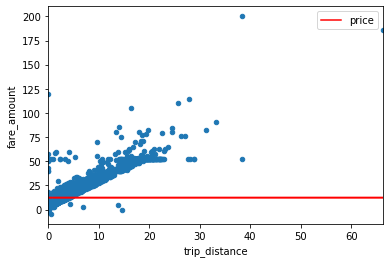

In [0]:
cov_xy = (yellow_tripdata_pandas["trip_distance"] * yellow_tripdata_pandas["fare_amount"]).sum() - (
    yellow_tripdata_pandas["trip_distance"].sum() * yellow_tripdata_pandas["fare_amount"].sum()
) / len(yellow_tripdata_pandas)
var_xy = (yellow_tripdata_pandas["trip_distance"] ** 2).sum() - yellow_tripdata_pandas["trip_distance"].sum() ** 2 / len(yellow_tripdata_pandas)
beta = cov_xy / var_xy
alpha = yellow_tripdata_pandas["fare_amount"].mean() - beta * yellow_tripdata_pandas["trip_distance"].mean()

alpha
# 12.486907739140417
beta
# 4.6752084884145456e-06

# Select some sample data and see how well we can fit the price
sample = yellow_tripdata_pandas.sample(10000)
sample["price"] = alpha + beta * sample["trip_distance"]
ax = sample.plot.scatter(x="trip_distance", y="fare_amount")
sample.plot.line(x="trip_distance", y="price", ax=ax, color="red")

As you can tell from the above image, as with any real life dataset, the New York City trip dataset also contains outliers that we need to clean to get a good regression. Hence we need to get rid of the noisy data that disturbs our basic regression example.

**Note**: The pandas program above is merely to show the dirty data/outliers, consider the following one for the rest of this section.

Alpha: 4.651606864470045
Beta: 2.661444816924383
ML Regression in Pandas: 2.7713353633880615


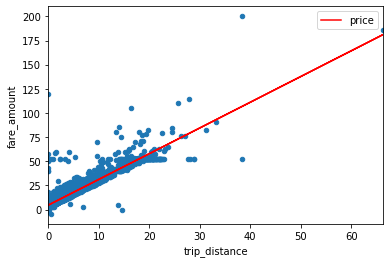

In [0]:
start = time.time()
cap_fare = yellow_tripdata_pandas["fare_amount"].mean() + 3 * yellow_tripdata_pandas["fare_amount"].std()
cap_distance = yellow_tripdata_pandas["trip_distance"].mean() + 3 * yellow_tripdata_pandas["trip_distance"].std()
df_filtered = yellow_tripdata_pandas.query(
    f"trip_distance > 0 and trip_distance < {cap_distance} and fare_amount > 0 and fare_amount < {cap_fare}"
)

# Train on the filtered data
cov_xy = (df_filtered["trip_distance"] * df_filtered["fare_amount"]).sum() - (
    df_filtered["trip_distance"].sum() * df_filtered["fare_amount"].sum()
) / len(df_filtered)
var_xy = (df_filtered["trip_distance"] ** 2).sum() - df_filtered[
    "trip_distance"
].sum() ** 2 / len(df_filtered)
beta = cov_xy / var_xy
alpha = df_filtered["fare_amount"].mean() - beta * df_filtered["trip_distance"].mean()

alpha
# 4.651606864471554
beta
# 2.661444816924383
end = time.time()
print("Alpha: " + str(alpha))
print("Beta: " + str(beta))
print("ML Regression in Pandas: " +str(end - start))
# Plot and check whether it fits better this time
sample["price"] = alpha + beta * sample["trip_distance"]
ax = sample.plot.scatter(x="trip_distance", y="fare_amount")
sample.plot.line(x="trip_distance", y="price", ax=ax, color="red")

Now, your task is to perform the same linear regression using both duckdb and sqlite.

**SQLite**:
Since SQLite doesn't have a function to compute the standard deviation and its a bit more complex than doing it in duckdb. We provide you with a solution that should be taken as inspiration for duckdb.
Here you only have to implement lines 46 and 49 to generate the samples necessary to plot a sample of the data + linear regression.

Alpha: 4.651606864488173
Beta: 2.6614448169181486
ML Regression in SQLite: 8.314350366592407


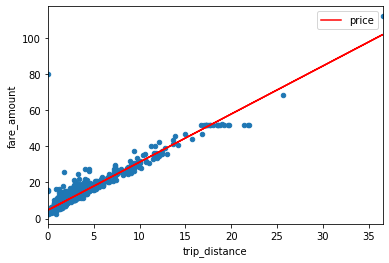

In [0]:
import math
start = time.time()
sqlite_cursor.execute("""
    SELECT 
        count(*),
        sub.avg_fa as avg_fare,
        sum((fare_amount - sub.avg_fa) * (fare_amount - sub.avg_fa)) as var_fare,
        sub.avg_td as avg_distance,
        sum((trip_distance - sub.avg_td) * (trip_distance - sub.avg_td)) as var_distance
    FROM 
        yellow_tripdata_2016_01,
        (
            SELECT
                AVG(fare_amount) as avg_fa,
                AVG(trip_distance) as avg_td
            FROM yellow_tripdata_2016_01
        ) as sub
""")
n, avg_fare, var_fare, avg_distance, var_distance = sqlite_cursor.fetchone()
max_fare = avg_fare + 3 * math.sqrt(var_fare / (n - 1))
max_distance = avg_distance + 3 * math.sqrt(var_distance / (n - 1))
max_fare, max_distance

sqlite_cursor.execute(f"""
SELECT
    (SUM(trip_distance * fare_amount) - SUM(trip_distance) * SUM(fare_amount) / COUNT(*)) /
    (SUM(trip_distance * trip_distance) - SUM(trip_distance) * SUM(trip_distance) / COUNT(*)) AS beta,
    AVG(fare_amount) AS avg_fare_amount,
    AVG(trip_distance) AS avg_trip_distance
FROM yellow_tripdata_2016_01
WHERE 
    fare_amount > 0 AND
    fare_amount < {max_fare} AND 
    trip_distance > 0 AND
    trip_distance < {max_distance}
""")
beta, avg_fare_amount, avg_trip_distance = sqlite_cursor.fetchone()
alpha = avg_fare_amount - beta * avg_trip_distance
end = time.time()
print("Alpha: " + str(alpha))
print("Beta: " + str(beta))
print("ML Regression in SQLite: " +str(end - start))


#Get a uniform random sample (size 1000) of trip_distance and fare_amount for plotting  
#TIP : Use ORDER BY RANDOM() and Limit
sqlite_cursor.execute("""
SELECT 
    trip_distance, 
    fare_amount
FROM
    yellow_tripdata_2016_01
ORDER BY RANDOM()
LIMIT 1000""")

#Get a pandas dataframe from sqlite
#TIP : pandas has a function to transform sqlite query results to a dataframe
sqlite_sample = sqlite_cursor.fetchall()
sqlite_df_sample =  pandas.DataFrame(sqlite_sample)
sqlite_df_sample.columns = ["trip_distance","fare_amount"]

sqlite_df_sample["price"] = alpha + beta * sqlite_df_sample["trip_distance"]
ax = sqlite_df_sample.plot.scatter(x="trip_distance", y="fare_amount")
sqlite_df_sample.plot.line(x="trip_distance", y="price", ax=ax, color="red")

**DUCKDB**

*TIP: DuckDB has a STDDEV_SAMP function (i.e., function that calculates standard deviation) and thus you can do the whole regression using one query.*

**Remember alpha and beta MUST have the same values from the pandas solution above**

Alpha: 4.651606864488173
Beta: 2.6614448169181486
ML Regression in DuckDB: 1.379394769668579


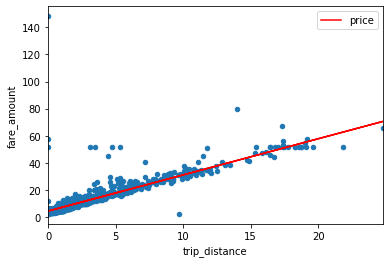

In [0]:
start = time.time()
#Implement the regression query
duck_regression = """
SELECT
    (SUM(trip_distance * fare_amount) - SUM(trip_distance) * SUM(fare_amount) / COUNT(*)) /
    (SUM(trip_distance * trip_distance) - SUM(trip_distance) * SUM(trip_distance) / COUNT(*)) AS beta,
    AVG(fare_amount) AS avg_fare_amount,
    AVG(trip_distance) AS avg_trip_distance
FROM 
    yellow_tripdata_2016_01,
    (
        SELECT 
            AVG(fare_amount) + 3 * STDDEV_SAMP(fare_amount)  AS max_fare,
            AVG(trip_distance) + 3 * STDDEV_SAMP(trip_distance) AS max_distance
        FROM yellow_tripdata_2016_01
    ) AS sub
WHERE 
    fare_amount > 0 AND
    fare_amount < sub.max_fare AND 
    trip_distance > 0 AND
    trip_distance < sub.max_distance
"""

duck_cursor.execute(duck_regression)
#Get the values from beta and alpha from the query (replace ... for code):
beta, avg_fare_amount, avg_trip_distance = duck_cursor.fetchone()
alpha = avg_fare_amount - beta * avg_trip_distance
end = time.time()
print("Alpha: " + str(alpha))
print("Beta: " + str(beta))
print("ML Regression in DuckDB: " +str(end - start))
#Get a uniform random sample (size 1000) of trip_distance and fare_amount for plotting  
#TIP : Use ORDER BY RANDOM() and Limit
duck_cursor.execute("""
SELECT 
    trip_distance,
    fare_amount
FROM
    yellow_tripdata_2016_01
ORDER BY RANDOM()
LIMIT 1000
"""
)

#Get a pandas dataframe from duckdb
#TIP : duckdb python's client has a function to transform query results to a dataframe
duck_sample = duck_cursor.fetchall()
duck_df_sample = pandas.DataFrame(duck_sample)
duck_df_sample.columns = ["trip_distance","fare_amount"]

duck_df_sample["price"] = alpha + beta * duck_df_sample["trip_distance"]
ax = duck_df_sample.plot.scatter(x="trip_distance", y="fare_amount")
duck_df_sample.plot.line(x="trip_distance", y="price", ax=ax, color="red")